# Import necessary libraries 

In [40]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the data

In [36]:
df = pd.read_csv('Competition_Dataset.csv')
df.head(5)

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

   Latitude (Y)  Longitude (X)  
0   -122.425892      37.774599  
1   -122.425892      37.774599  
2   -122.424363      37.800414  
3   -122.426995      37.800873  
4   -122.438738      37.771541

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dates          680826 non-null  object 
 1   Category       680826 non-null  object 
 2   Descript       680826 non-null  object 
 3   DayOfWeek      680826 non-null  object 
 4   PdDistrict     680826 non-null  object 
 5   Resolution     680826 non-null  object 
 6   Address        680826 non-null  object 
 7   Latitude (Y)   680826 non-null  float64
 8   Longitude (X)  680826 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.7+ MB


from the info of the dataframe above there are no null values 

In [6]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)'],
      dtype='object')

# Data Visualisation

## Number of Crime and time

In [38]:
# Convert 'timestamp' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Extract date and hour
df['date'] = df['Dates'].dt.date
df['hour'] = df['Dates'].dt.hour
df['month_year'] = df['Dates'].dt.strftime('%m-%Y')
df['year'] = df['Dates'].dt.year

### Number of crimes per daytime

In [8]:
# Count crimes per hour
crime_by_hour = df.groupby('hour').size().reset_index(name='crime_count')
# Create histogram with adjustable bins
fig_1 = px.histogram(df, x='hour', nbins=12,  
                   title='Crime Traffic During the Day',
                   labels={'hour': 'Hour of the Day', 'count': 'Number of Crimes'},
                   color_discrete_sequence=['skyblue'])
fig_1.update_traces(marker=dict(line=dict(color='black', width=1.5)))
# Show plot
fig_1.show()

The crime rate is lower in the early hours of the morning 4-5 and the highest at 16-17 in the afternoon
Now lits check if it is consistnce in all the day by polting random day of each year

In [9]:
# Create an empty DataFrame to store results
crime_by_hour_all = pd.DataFrame()

# Loop through each year from 2003 to 2016
for i in range(2003, 2016):
    day = str(i) + '-05-13'
    df_t = df[df['date'] == pd.to_datetime(day).date()]
    crime_by_hour = df_t.groupby('hour').size().reset_index(name='crime_count')
    crime_by_hour['year'] = str(i)
    crime_by_hour_all = pd.concat([crime_by_hour_all, crime_by_hour], ignore_index=True)

# Create interactive line plot
fig_2 = px.line(crime_by_hour_all, x='hour', y='crime_count', color='year',
              title='Crime Trends on May 13 Over the Years',
              labels={'hour': 'Hour of the Day', 'crime_count': 'Number of Crimes'},
              markers=True)

# Show plot
fig_2.show()

### Number of crimes per day

In [10]:
#Count number of crimes per day
crime_counts = df.groupby(['date']).size().reset_index(name='crime_count_day')

# Create interactive bar chart
fig_3 = px.line(crime_counts, x='date', y='crime_count_day',   
             title='Number of Crimes Per Day', 
             labels={'date': 'Date', 'crime_count_day': 'Number of Crimes'},
             markers=True )

# Show plot
fig_3.show()

There is a day with low number of crimes 2, this maybe outlier 

In [11]:
# Create interactive box plot
fig_4 = px.box(crime_counts, x='crime_count_day',
             title='Crime Count Per Day - Outlier Detection',
             labels={'crime_count_day': 'Number of Crimes Per Day'},
             boxmode='overlay')


# Rotate x-axis labels for better visibility
fig_4.update_layout(yaxis_title="Number of Crimes Per Day", xaxis_title="")

# Show plot
fig_4.show()

There is one that stand out 

### Number of crimes per DayOfWeek

In [12]:

# Count number of crimes per weekday
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_DayOfWeek_counts = df.groupby('DayOfWeek').size().reindex(cats) 
crime_DayOfWeek_counts

# Create interactive line plot
fig = px.line(crime_DayOfWeek_counts,   
             title='Number of Crimes Per Day of the Week', 
             labels={'DayOfWeek': 'Day of the Week', 'crime_count_DayOfWeek': 'Number of Crimes'},
             markers=True )

# Show plot
fig.show()

Notes:
- Sunday is the day with the least number of crime
- Friday is the day with the highest number of crime 


### Number of crimes per Month

Since the "day Vs the number of crimes" plot  is crowded we will look at the number  of crime per month 

In [13]:
# Count number of crimes per month
crime_counts_m = df.groupby('month_year').size().reset_index(name='crime_count_month')
crime_counts_m['month_year'] = pd.to_datetime(crime_counts_m['month_year'], format='%m-%Y')
crime_counts_m = crime_counts_m.sort_values('month_year')
crime_counts_m['month_year'] = crime_counts_m['month_year'].dt.strftime('%m-%Y')

# Create interactive bar chart
fig_4 = px.line(crime_counts_m, x='month_year', y='crime_count_month',   
             title='Number of Crimes Per Month', 
             labels={'date': 'Date', 'crime_count_month': 'Number of Crimes'},
             markers=True )

# Show plot
fig_4.show()

### Number of the crimes Vs the years

In [14]:
#Count number of crimes per day
crime_counts_y = df.groupby(['year']).size().reset_index(name='crime_count_year')

# Create interactive bar chart
fig_5 = px.line(crime_counts_y, x='year', y='crime_count_year',   
             title='Number of Crimes Per year', 
             labels={'year': 'Year', 'crime_count_year': 'Number of Crimes'},
             markers=True )

# Show plot
fig_5.show()

The numbers of crimes seem to be steady during the years with low fluctuation

## Number of Crime and Category

In [15]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'WEAPON LAWS', 'BURGLARY',
       'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC',
       'TRESPASS', 'MISSING PERSON', 'KIDNAPPING', 'RUNAWAY', 'FRAUD',
       'DISORDERLY CONDUCT', 'ARSON', 'BRIBERY', 'EMBEZZLEMENT',
       'EXTORTION', 'BAD CHECKS', 'STOLEN PROPERTY', 'RECOVERED VEHICLE'],
      dtype=object)

In [16]:

crime_category_counts = df['Category'].value_counts().reset_index()
crime_category_counts.columns = ['Category', 'Count']

# Create an interactive pie chart
fig_6 = px.pie(crime_category_counts, 
             names='Category', 
             values='Count', 
             title='Crime Categories Distribution',
             hole=0.3)  # Adjust hole size for a donut-style pie chart

# Show plot
fig_6.show()


In [17]:
# Count number of crimes per month for each Category 
crime_trends  = df.groupby(['month_year', 'Category']).size().reset_index(name='crime_count')
crime_trends['month_year'] = pd.to_datetime(crime_trends['month_year'], format='%m-%Y')
crime_trends  = crime_trends .sort_values('month_year')
crime_trends ['month_year'] = crime_trends ['month_year'].dt.strftime('%m-%Y')

# Create interactive bar chart
fig_7 = px.line(crime_trends, x='month_year', y='crime_count', color='Category',
              title='Crime Trends by Category Over Time',
              labels={'month_year': 'Month-Year', 'crime_count': 'Number of Crimes'},
              markers=True)

# Show plot
fig_7.show()

Interesting notes :
- "VEHICLE THEFT" crimes had a drop in Nov 2005
- "LARCENY/THEFT" is the most number of crime that keeps rising 
- "DRUG/NARCOTIC" Also droped in 2009

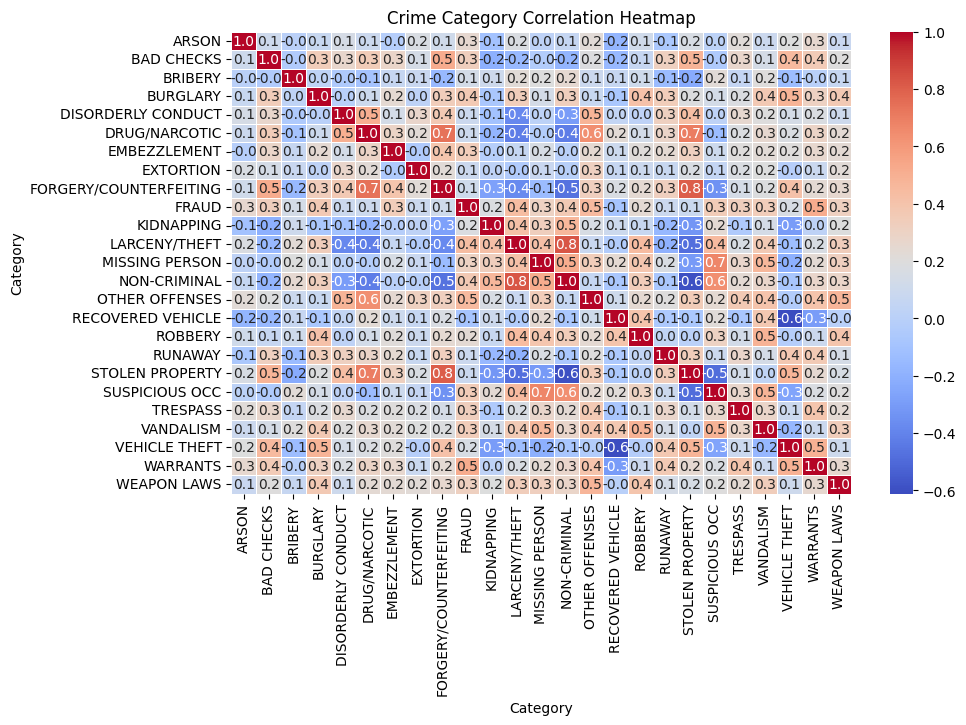

In [19]:


# Pivot the dataset to get crime counts per month for each category
crime_pivot = df.groupby(['month_year', 'Category']).size().unstack(fill_value=0)

# Compute correlation between crime categories
correlation_matrix = crime_pivot.corr()


# Plot heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title("Crime Category Correlation Heatmap")
plt.show()

It seem that there is a relation beetween some crime Catagory such as "STOLEN PROPERTY" AND "FORGERY/COUNTERFEITING", also both of these crimes are releated to "DRUG/NARCOTIC" farther inspection is needed to conform the relation 

## Number of Crime and Resolution

In [ ]:
df['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [21]:
crime_Resolution_counts = df['Resolution'].value_counts().reset_index()
crime_Resolution_counts.columns = ['Resolution', 'Count']

# Create an interactive pie chart
fig_8 = px.pie(crime_Resolution_counts, 
             names='Resolution', 
             values='Count', 
             title='Crime Resolution Distribution',
             hole=0.3)  

# Show plot
fig_8.show()

This mean that most of the cases were not solved 

In [ ]:
# Define categories
dealt_with = [
    'ARREST, BOOKED', 'ARREST, CITED', 'JUVENILE BOOKED', 'EXCEPTIONAL CLEARANCE',
    'LOCATED', 'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE DIVERTED',
    'JUVENILE ADMONISHED', 'JUVENILE CITED', 'PROSECUTED BY OUTSIDE AGENCY',
    'PROSECUTED FOR LESSER OFFENSE'
]

not_dealt_with = [
    'NONE', 'PSYCHOPATHIC CASE', 'UNFOUNDED', 'NOT PROSECUTED',
    'COMPLAINANT REFUSES TO PROSECUTE', 'DISTRICT ATTORNEY REFUSES TO PROSECUTE'
]

# Create a new column in DataFrame
df['Resolution_Status'] = df['Resolution'].apply(lambda x: 1 if x in dealt_with else 0)


Resolution_Status
0    450801
1    230025
Name: count, dtype: int64

In [27]:
crime_Resolution_counts = df['Resolution_Status'].value_counts().reset_index()
crime_Resolution_counts.columns = ['Resolution_Status', 'Count']
# Create an interactive pie chart
fig_9 = px.pie(crime_Resolution_counts, 
             names='Resolution_Status', 
             values='Count', 
             title='Crime Resolution_Status Distribution',
             hole=0.3)  

# Show plot
fig_9.show()

## Maps

In [39]:
df[df['year'] == 2005]

Dates                Category  \
509795 2005-12-31 23:58:00          MISSING PERSON   
509796 2005-12-31 23:57:00          OTHER OFFENSES   
509797 2005-12-31 23:50:00           LARCENY/THEFT   
509798 2005-12-31 23:50:00          OTHER OFFENSES   
509799 2005-12-31 23:45:00           LARCENY/THEFT   
...                    ...                     ...   
565857 2005-01-10 00:01:00                BURGLARY   
565858 2005-01-10 00:01:00          OTHER OFFENSES   
565859 2005-01-10 00:01:00  FORGERY/COUNTERFEITING   
565860 2005-01-10 00:01:00                   FRAUD   
565861 2005-01-10 00:01:00           VEHICLE THEFT   

                                           Descript DayOfWeek PdDistrict  \
509795                                MISSING ADULT  Saturday   SOUTHERN   
509796                       OBSCENE PHONE CALLS(S)  Saturday    MISSION   
509797                  GRAND THEFT FROM A BUILDING  Saturday    CENTRAL   
509798                            TRAFFIC VIOLATION  Saturday    TARAVAL   
509799                      PETTY THEFT OF PROPERTY  Saturday   SOUTHERN   
...                                             ...       ...        ...   
565857  BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY    Monday   SOUTHERN   
565858                       OBSCENE PHONE CALLS(S)    Monday    MISSION   
565859          FORGERY, DRIVERS LICENSE OR ID-CARD    Monday   RICHMOND   
565860                 CREDIT CARD, THEFT BY USE OF    Monday   NORTHERN   
565861                            STOLEN AUTOMOBILE    Monday    BAYVIEW   

            Resolution                     Address  Latitude (Y)  \
509795         LOCATED          0 Block of MOSS ST   -122.407999   
509796            NONE       4200 Block of 24TH ST   -122.437412   
509797            NONE  BATTERY ST / SACRAMENTO ST   -122.400153   
509798   ARREST, CITED     PLYMOUTH AV / SADOWA ST   -122.456045   
509799            NONE     500 Block of MISSION ST   -122.398913   
...                ...                         ...           ...   
565857            NONE     0 Block of SOUTHPARK AV   -122.393093   
565858            NONE       4000 Block of 18TH ST   -122.433343   
565859  NOT PROSECUTED        600 Block of 45TH AV   -122.506021   
565860            NONE     3000 Block of LAGUNA ST   -122.430948   
565861            NONE         0 Block of BLAIR TR   -122.399410   

        Longitude (X)        date  hour month_year  year  
509795      37.777824  2005-12-31    23    12-2005  2005  
509796      37.751142  2005-12-31    23    12-2005  2005  
509797      37.794135  2005-12-31    23    12-2005  2005  
509798      37.712320  2005-12-31    23    12-2005  2005  
509799      37.788629  2005-12-31    23    12-2005  2005  
...               ...         ...   ...        ...   ...  
565857      37.782336  2005-01-10     0    01-2005  2005  
565858      37.760933  2005-01-10     0    01-2005  2005  
565859      37.776236  2005-01-10     0    01-2005  2005  
565860      37.799295  2005-01-10     0    01-2005  2005  
565861      37.751224  2005-01-10     0    01-2005  2005  

[56067 rows x 13 columns]

In [42]:
df_05=df[df['year'] == 2005]
crime_map = folium.Map(location=[df_05['Latitude (Y)'].mean(), df_05['Longitude (X)'].mean()], zoom_start=12)

# Create a list of latitude and longitude points
heat_data = df_05[['Latitude (Y)', 'Longitude (X)']].values.tolist()

# Add a heatmap layer
HeatMap(heat_data, radius=10).add_to(crime_map)

# Display the map
crime_map